In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sklearn.tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

SEED = 42
DATASET_ID = 0      # 0 = original data, 1 = PCA 100 data, 2 = PCA 80 data
FILENAME_0 = "original_tpm_data.csv"
FILENAME_1 = "pca_data_100.csv"
FILENAME_2 = "pca_data_080.csv"

In [2]:

def load_data(dataset:int): 
    """
    loads data into pd dataFrame. either original or pca

    Args:
        dataset (int): 0 = original data, 1 = PCA 100 data, 2 = PCA 80 data
    """

    # choose dataset according to user input (parameter dataset)
    if dataset==0:
        print("  loading original data")
        data = pd.read_csv(filepath_or_buffer=FILENAME_0)    # this dataset needs to be created locally, using notebook 01. It is too large for git
    elif dataset==1:
        print("  loading pca data")
        data = pd.read_csv(filepath_or_buffer=FILENAME_1)
    elif dataset==2:
        data = pd.read_csv(filepath_or_buffer=FILENAME_2)

    # change ctargel col "cancer_type" from string label to int val
    map = {
        "kidney chromophobe": 0,
        "kidney renal clear cell carcinoma": 1,
        "kidney renal papillary cell carcinoma": 2,
    }
    data1 = data.copy()
    data1['cancer_type'] = data1['cancer_type'].replace(map)
    
    return data1

# Step 1 Loading data
print("Step 1: Loading data")

# load anyway
#data = load_data(DATASET_ID)

# load if necessary
try:
    data                 # its ok that this var is not defined 
except NameError:
    data = load_data(DATASET_ID)

data.head()

Step 1: Loading data
  loading original data


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC092910.4,AC073611.1,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6,cancer_type
0,8.2367,0.0000,25.8092,0.9317,0.2657,2.9539,1.4042,15.7151,4.5194,4.9240,...,0.0000,0.1066,0.0,0.0,0.0,3.6421,0.0,0.0035,0.7835,0
1,4.0204,0.1582,16.6135,0.5691,0.1217,1.4957,0.1268,10.0106,3.0583,2.1101,...,0.0000,0.2003,0.0,0.0,0.0,2.4549,0.0,0.0944,0.4324,0
2,30.3101,0.0000,194.5276,4.1172,4.2266,9.3357,11.7886,63.2781,8.2357,61.3211,...,0.0000,0.5563,0.0,0.0,0.0,10.8131,0.0,0.0336,1.5405,0
3,192.6733,2.2687,166.1158,13.8005,2.6671,9.7596,9.5741,62.3076,7.1604,30.2865,...,0.0000,0.1799,0.0,0.0,0.0,11.7993,0.0,0.2841,0.5695,0
4,29.3118,0.2938,56.6818,1.8314,0.4773,0.5403,0.5084,25.3080,5.7213,5.0955,...,0.5162,0.1739,0.0,0.0,0.0,6.1702,0.0,0.0129,0.1659,0


In [3]:
def split_data(data: DataFrame, seed = SEED) -> tuple[DataFrame, DataFrame, DataFrame, DataFrame]:
    """
    returns Train Test splittet Tensors

    Args:
        data (pd Dataframe): whole dataset

    Returns:
        torch tensor: 4-tuple of train test data
    """

    # Split the data into features (X) and target variable (y)
    X = data.drop('cancer_type', axis=1)
    y = data['cancer_type']

    X_train_pd, X_test_pd, y_train_pd, y_test_pd = train_test_split(X, y, test_size=0.2, random_state=seed)

    return (X_train_pd, X_test_pd, y_train_pd, y_test_pd)

# Step 2 Splitting data & formatting to tensor
print("Step 2: Splitting data & formatting to tensor")

(X_train, X_test, y_train, y_test) = split_data(data)

# Print the shapes of the datasets
print("  X_train:", X_train.shape)
print("  X_test:", X_test.shape)
print("  y_train:", y_train.shape)
print("  y_test:", y_test.shape)


Step 2: Splitting data & formatting to tensor
  X_train: (822, 60660)
  X_test: (206, 60660)
  y_train: (822,)
  y_test: (206,)


In [4]:
def visualize_results(X_test, y_test, classifier) -> tuple[float, float, float, float]:
    features = X_test.columns.tolist()
    class_names = ["kidney chromophobe", "kidney renal papillary cell carcinoma", "kidney renal clear cell carcinoma"]

    _, ax = plt.subplots(figsize=(30,30)) # Resize figure
    sklearn.tree.plot_tree(classifier, filled=True, ax=ax, class_names = class_names, feature_names=features, fontsize=10)

    text_representation = sklearn.tree.export_text(classifier, feature_names=features)
    print(text_representation)

    plt.show()

    # Predict the target variable for the validation data
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}\n")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return accuracy, precision, recall, f1


In [5]:
# Step 3: create Tree (original)
print("Step 3: create Tree")

# Create an instance of the DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=SEED)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Predict the target variable for the validation data
y_pred = classifier.predict(X_test)

Step 3: create Tree


|--- NDUFA4L2 <= 83.56
|   |--- AVPR1A <= 1.69
|   |   |--- HNRNPA1P4 <= 1.31
|   |   |   |--- class: 2
|   |   |--- HNRNPA1P4 >  1.31
|   |   |   |--- AL137024.1 <= 0.11
|   |   |   |   |--- class: 1
|   |   |   |--- AL137024.1 >  0.11
|   |   |   |   |--- OR5F2P <= 0.03
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- OR5F2P >  0.03
|   |   |   |   |   |--- class: 1
|   |--- AVPR1A >  1.69
|   |   |--- HSPD1P5 <= 0.25
|   |   |   |--- AL080317.2 <= 0.63
|   |   |   |   |--- RPL23AP32 <= 0.44
|   |   |   |   |   |--- MKRN5P <= 0.19
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- MKRN5P >  0.19
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- RPL23AP32 >  0.44
|   |   |   |   |   |--- AC104653.1 <= 0.66
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- AC104653.1 >  0.66
|   |   |   |   |   |   |--- AC104819.1 <= 0.04
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- AC104819.1 >  0.04
|   |   |   |   |   |   |   |--- cla

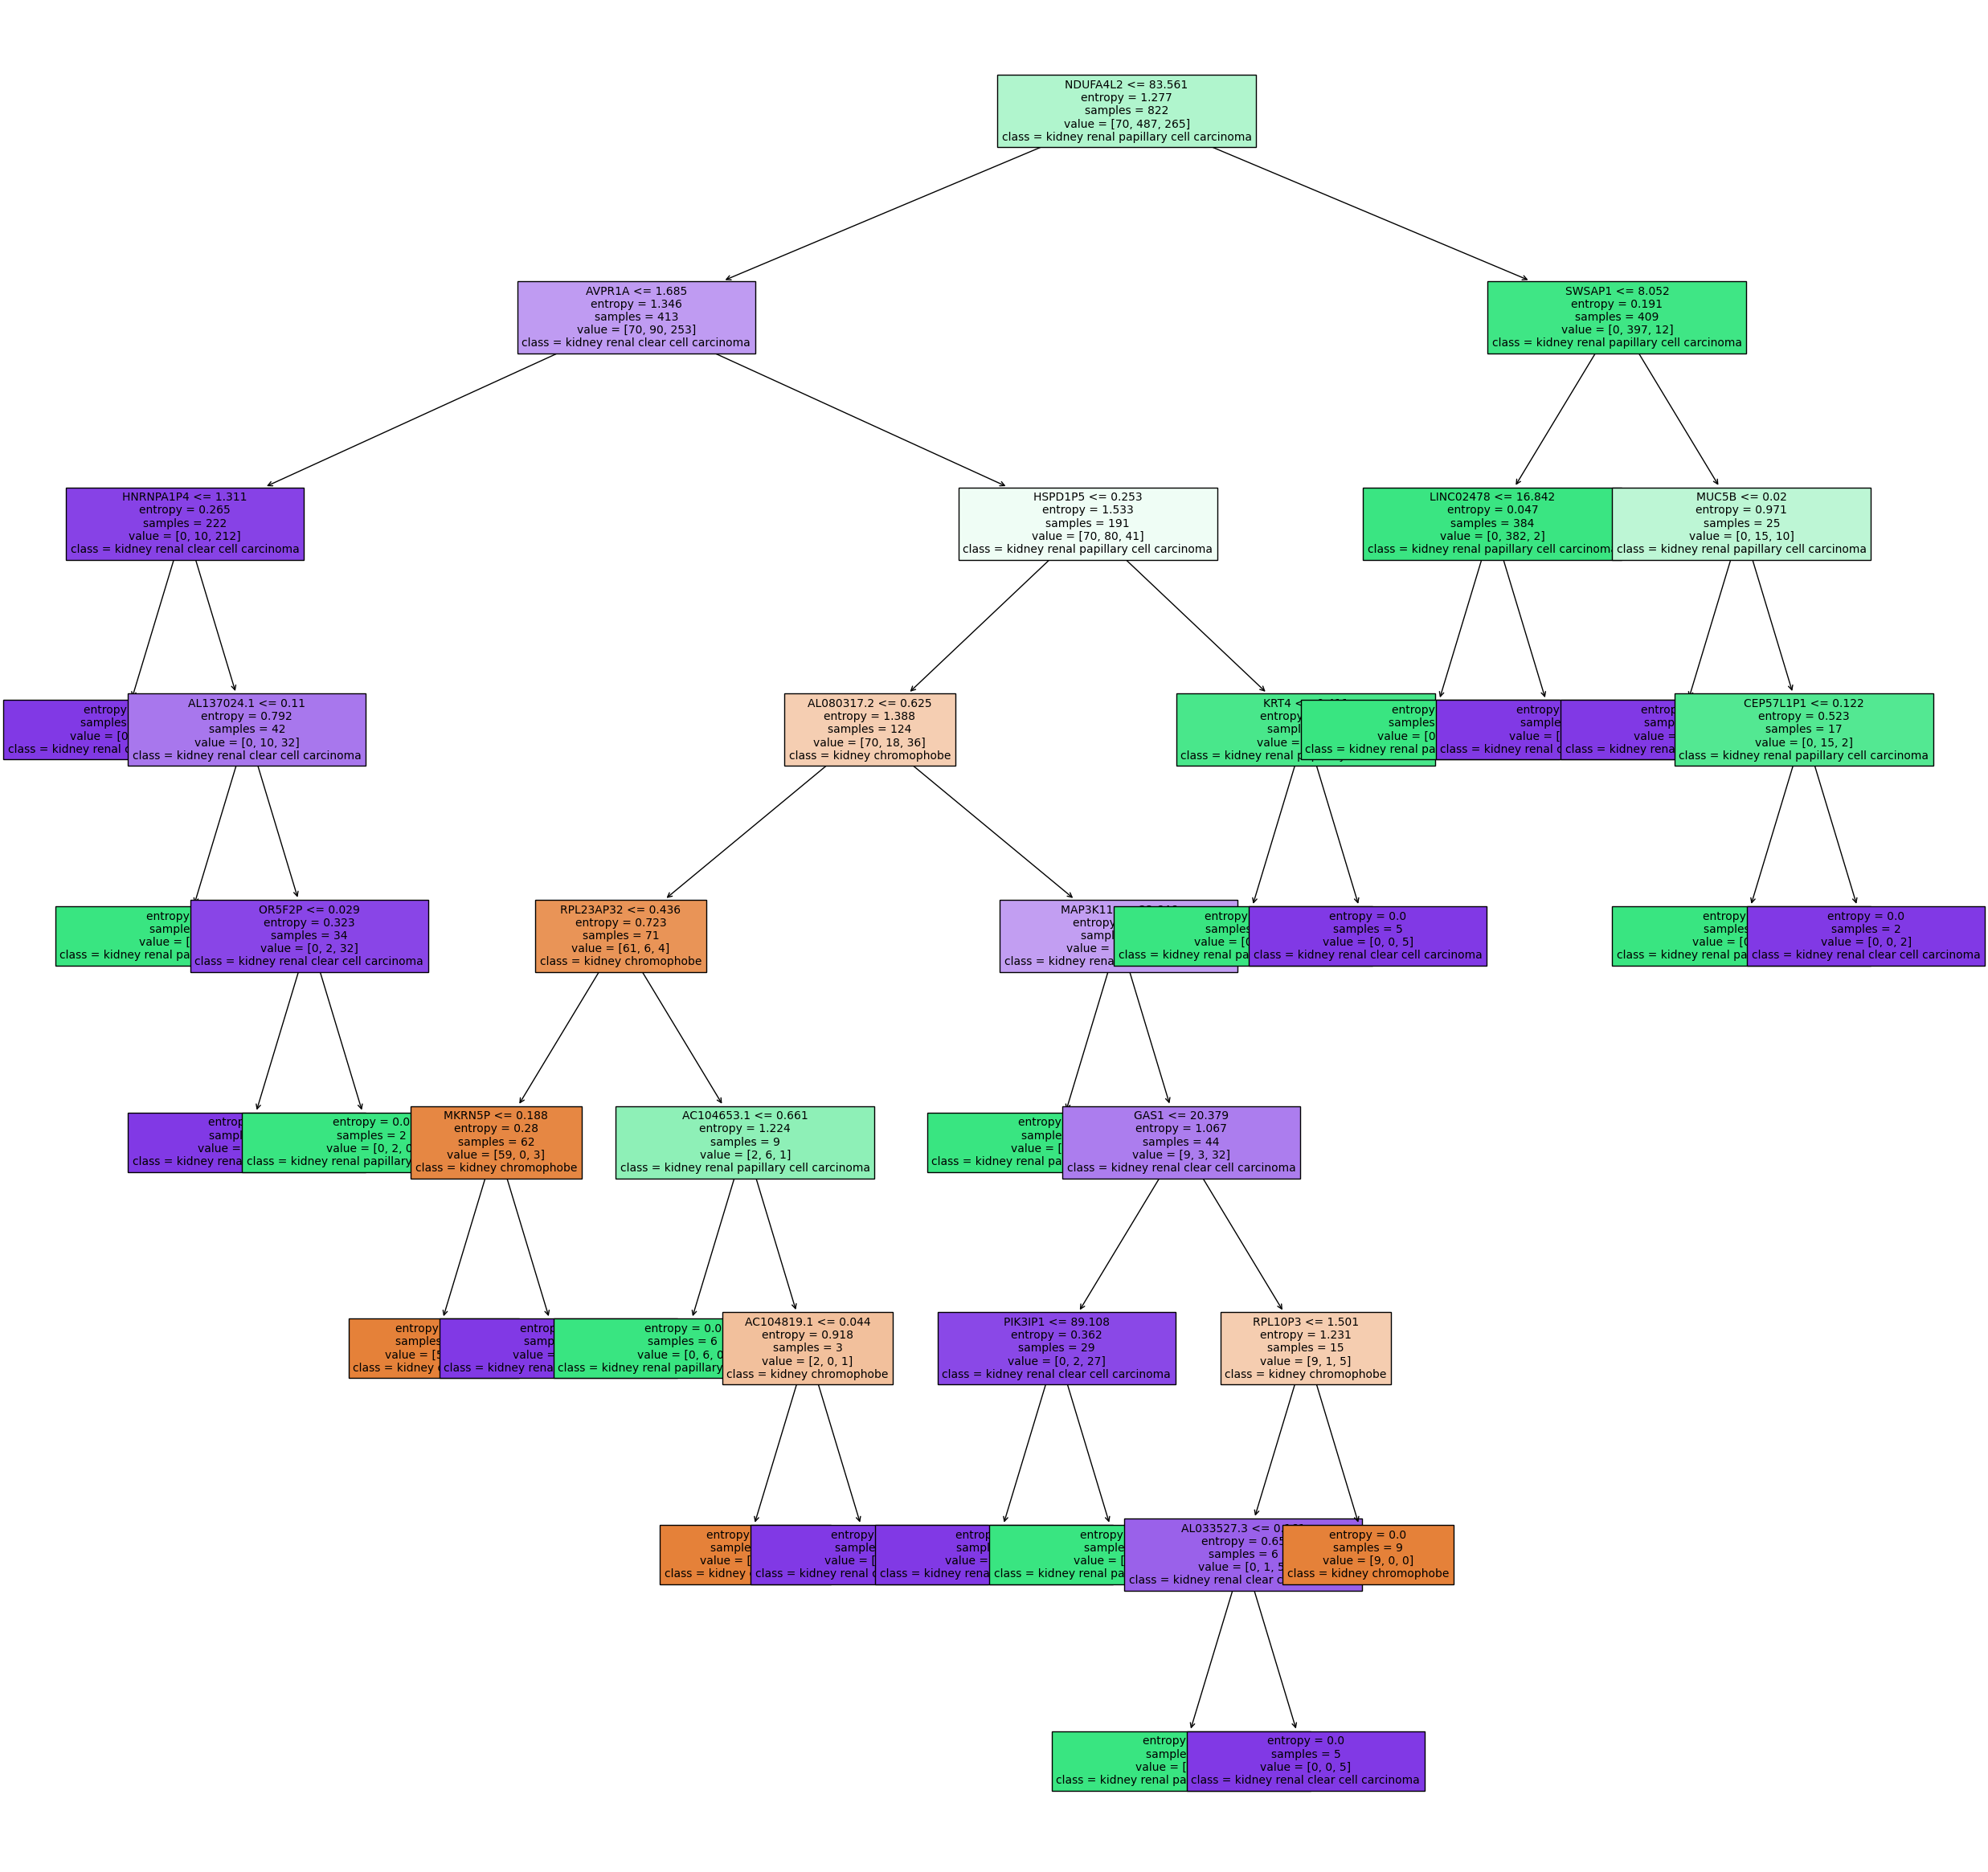

Accuracy: 0.927, Precision: 0.929, Recall: 0.927, F1 Score: 0.927

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.92      0.96      0.94       127
           2       0.96      0.86      0.91        58

    accuracy                           0.93       206
   macro avg       0.92      0.91      0.91       206
weighted avg       0.93      0.93      0.93       206

Confusion Matrix:
[[ 19   2   0]
 [  3 122   2]
 [  0   8  50]]


(0.9271844660194175, 0.928564962545545, 0.9271844660194175, 0.9268456306162334)

In [6]:
#original tree
visualize_results(X_test, y_test, classifier)

In [7]:
## tree min_samples_split

|--- NDUFA4L2 <= 83.56
|   |--- AVPR1A <= 1.69
|   |   |--- HNRNPA1P4 <= 1.31
|   |   |   |--- class: 2
|   |   |--- HNRNPA1P4 >  1.31
|   |   |   |--- AL137024.1 <= 0.11
|   |   |   |   |--- class: 1
|   |   |   |--- AL137024.1 >  0.11
|   |   |   |   |--- OR5F2P <= 0.03
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- OR5F2P >  0.03
|   |   |   |   |   |--- class: 1
|   |--- AVPR1A >  1.69
|   |   |--- HSPD1P5 <= 0.25
|   |   |   |--- AL080317.2 <= 0.63
|   |   |   |   |--- RPL23AP32 <= 0.44
|   |   |   |   |   |--- MKRN5P <= 0.19
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- MKRN5P >  0.19
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- RPL23AP32 >  0.44
|   |   |   |   |   |--- AC104653.1 <= 0.66
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- AC104653.1 >  0.66
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- AL080317.2 >  0.63
|   |   |   |   |--- MED16 <= 42.22
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- MED16 >  

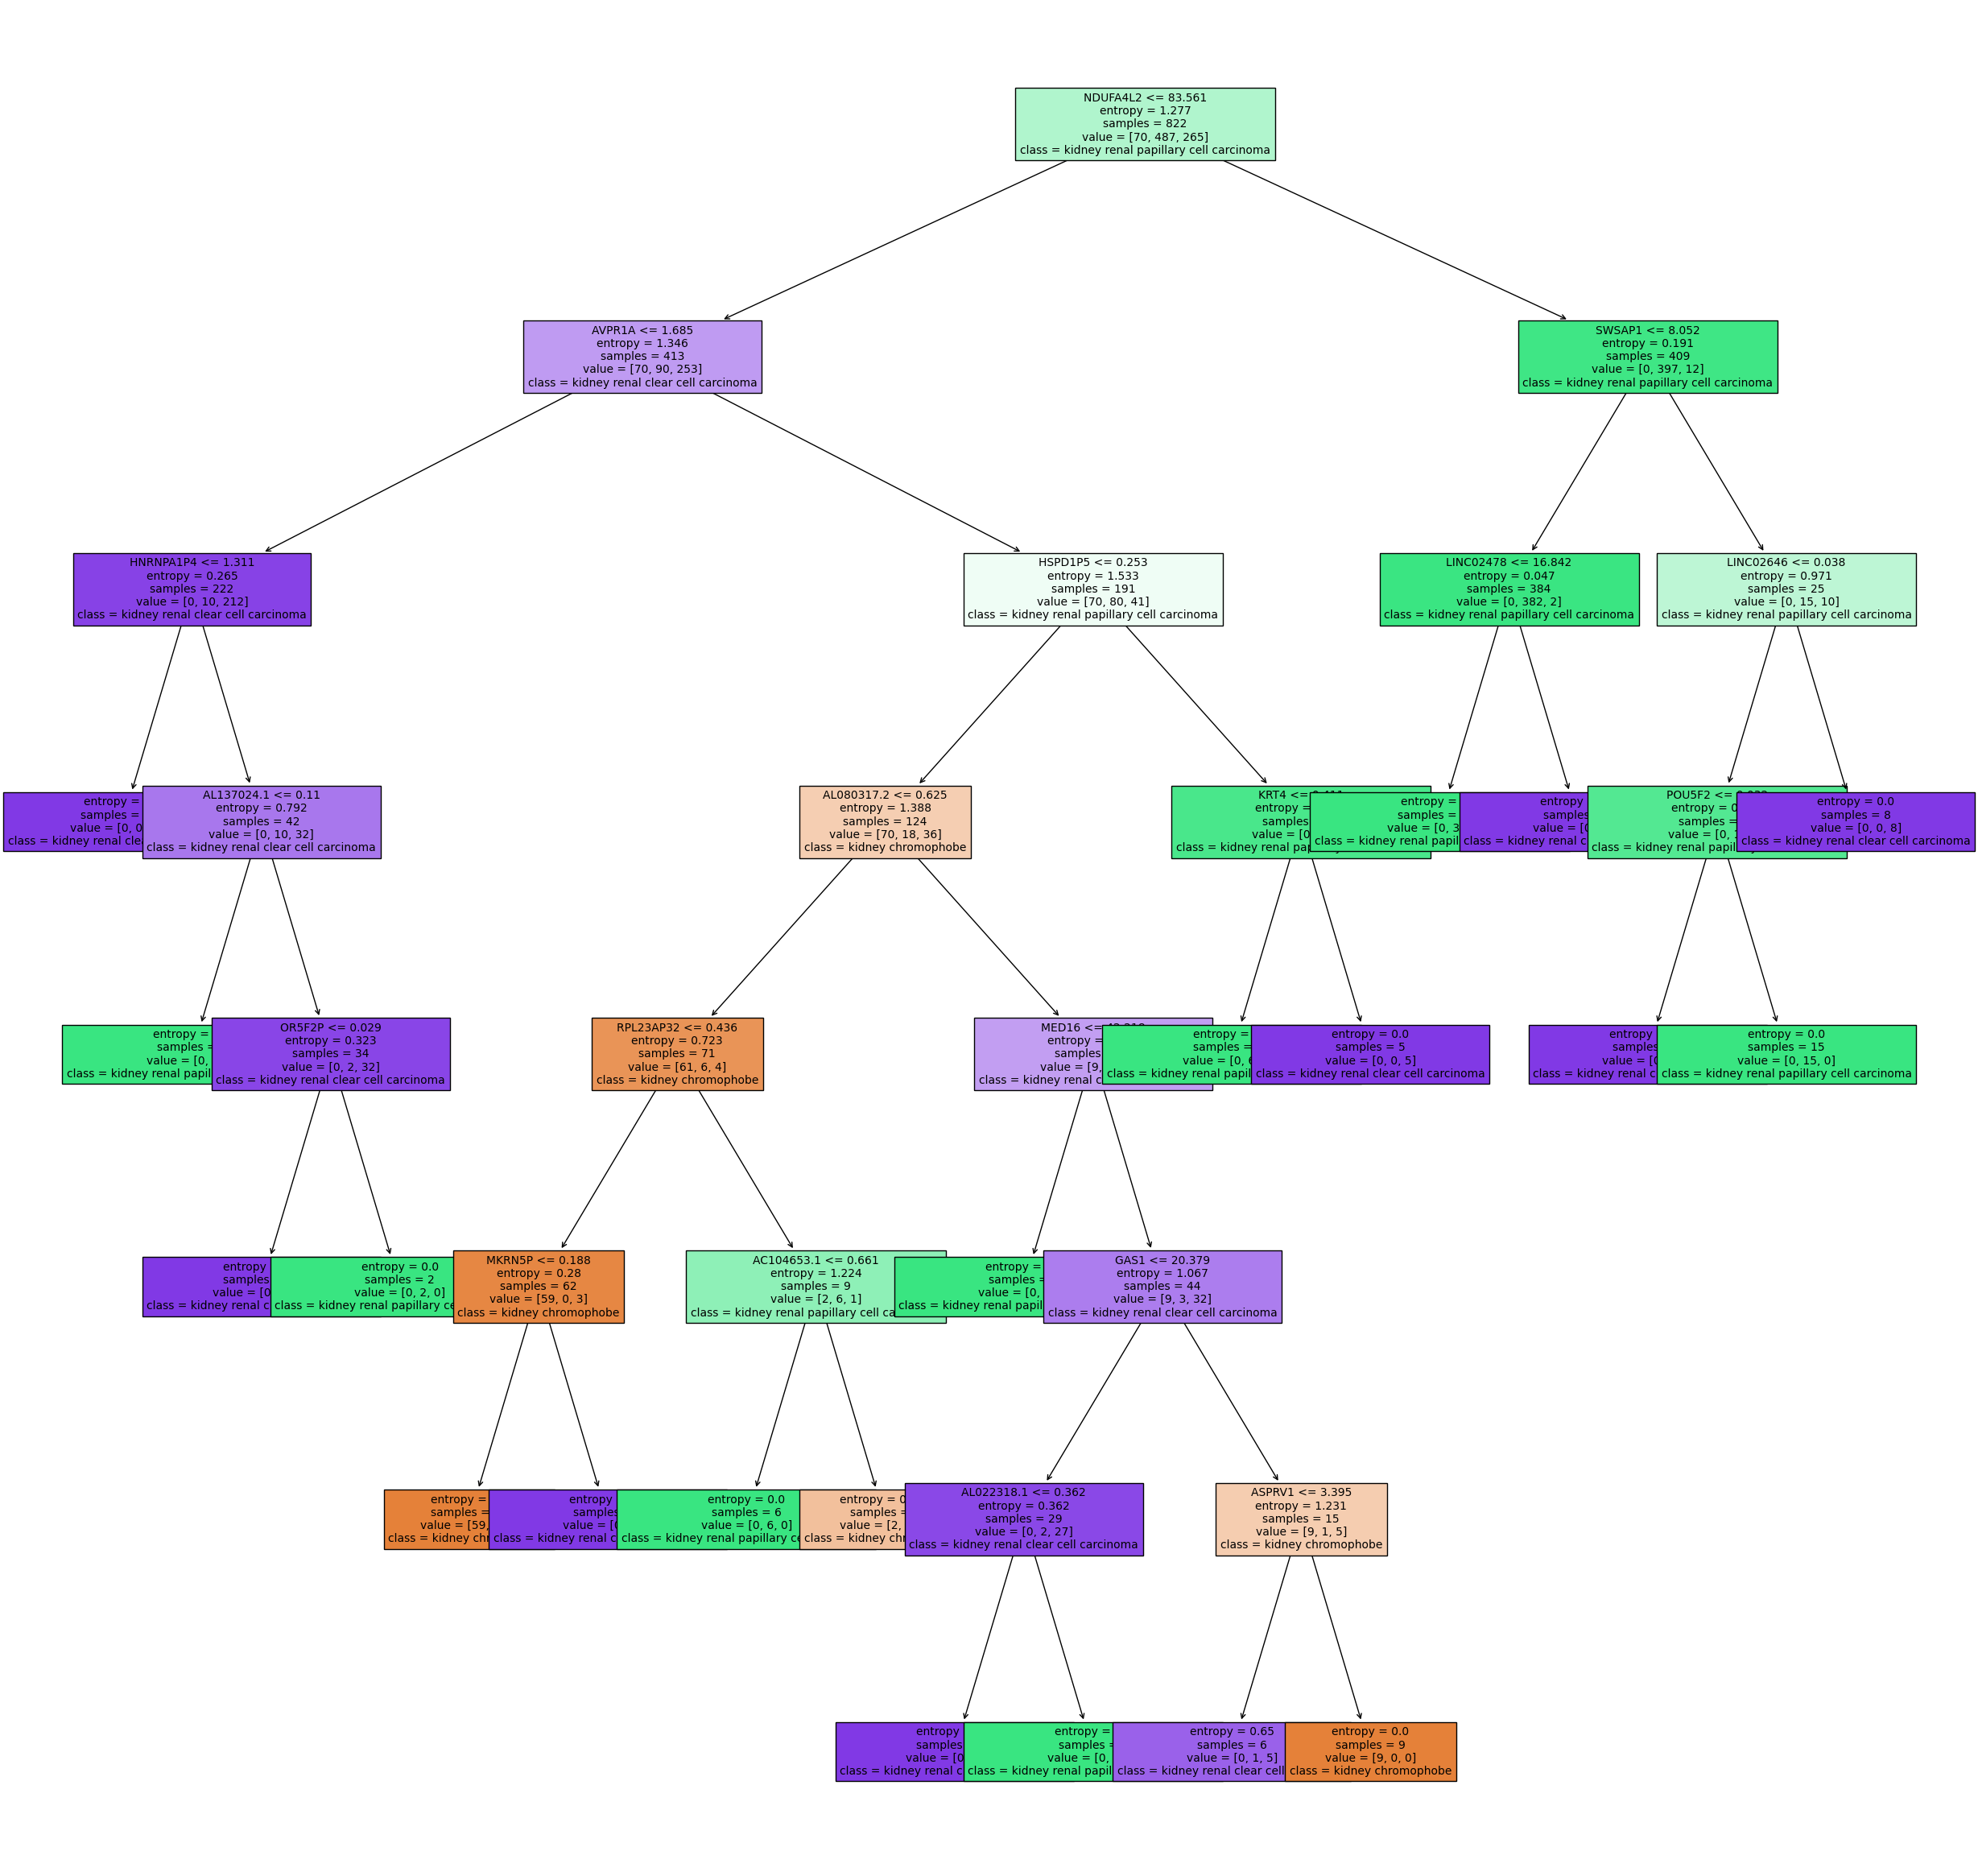

Accuracy: 0.913, Precision: 0.914, Recall: 0.913, F1 Score: 0.912

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.92      0.94      0.93       127
           2       0.94      0.84      0.89        58

    accuracy                           0.91       206
   macro avg       0.89      0.90      0.89       206
weighted avg       0.91      0.91      0.91       206

Confusion Matrix:
[[ 19   2   0]
 [  4 120   3]
 [  0   9  49]]


(0.912621359223301, 0.9142599519582432, 0.912621359223301, 0.9123719698680186)

In [8]:
np.random.seed(SEED)

# Create an instance of the DecisionTreeClassifier
classifier_1 = DecisionTreeClassifier(criterion="entropy", random_state=SEED,min_samples_split=7)

# Fit the classifier to the training data
classifier_1.fit(X_train, y_train)

visualize_results(X_test, y_test, classifier_1)

In [9]:
## min_split_leaf  

|--- NDUFA4L2 <= 83.56
|   |--- AVPR1A <= 1.69
|   |   |--- HNRNPA1P4 <= 1.31
|   |   |   |--- class: 2
|   |   |--- HNRNPA1P4 >  1.31
|   |   |   |--- AL137024.1 <= 0.11
|   |   |   |   |--- class: 1
|   |   |   |--- AL137024.1 >  0.11
|   |   |   |   |--- ZNF557 <= 8.04
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- ZNF557 >  8.04
|   |   |   |   |   |--- class: 2
|   |--- AVPR1A >  1.69
|   |   |--- HSPD1P5 <= 0.25
|   |   |   |--- AL080317.2 <= 0.63
|   |   |   |   |--- RPL23AP32 <= 0.44
|   |   |   |   |   |--- MIR616 <= 10.44
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- MIR616 >  10.44
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- RPL23AP32 >  0.44
|   |   |   |   |   |--- class: 1
|   |   |   |--- AL080317.2 >  0.63
|   |   |   |   |--- MAP3K11 <= 22.65
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- MAP3K11 >  22.65
|   |   |   |   |   |--- GAS1 <= 20.38
|   |   |   |   |   |   |--- MAP6 <= 11.51
|   |   |   |   |   |   |   |--- cla

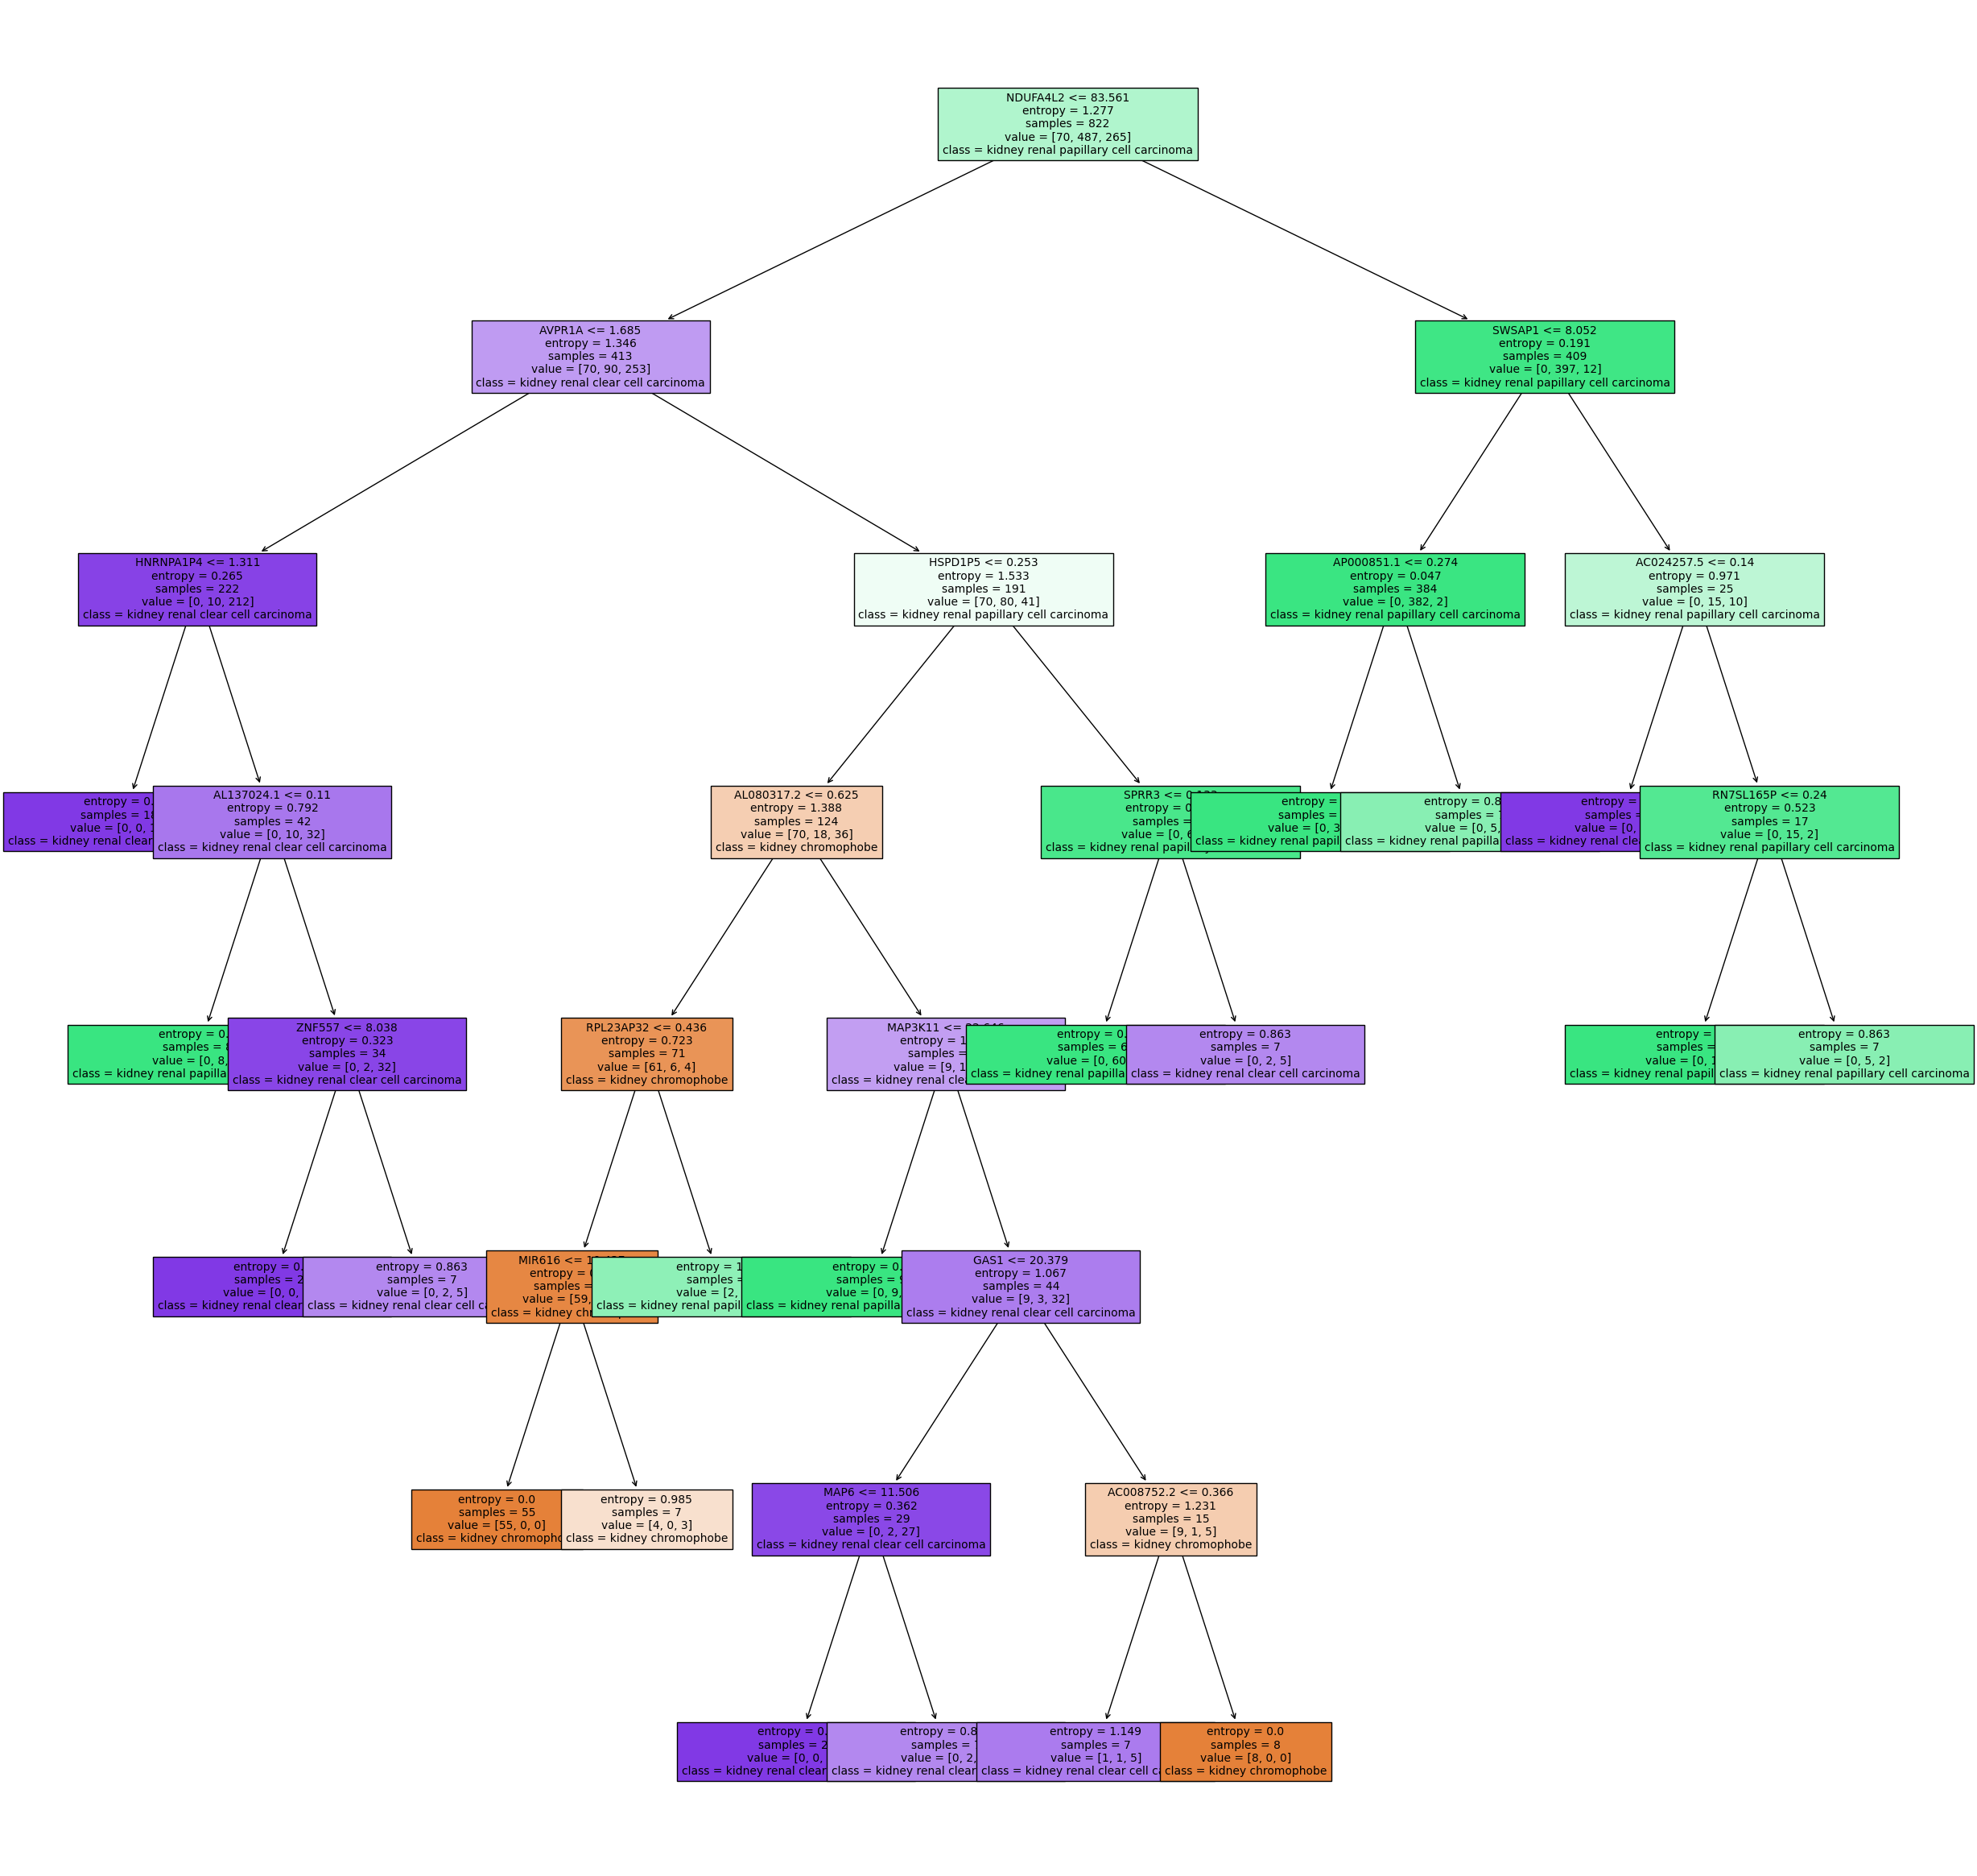

Accuracy: 0.937, Precision: 0.938, Recall: 0.937, F1 Score: 0.937

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.94      0.96      0.95       127
           2       0.96      0.90      0.93        58

    accuracy                           0.94       206
   macro avg       0.92      0.92      0.92       206
weighted avg       0.94      0.94      0.94       206

Confusion Matrix:
[[ 19   2   0]
 [  3 122   2]
 [  0   6  52]]


(0.9368932038834952,
 0.9377321887030625,
 0.9368932038834952,
 0.9368502809631452)

In [10]:
# Create an instance of the DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(criterion="entropy", random_state=SEED, min_samples_leaf=7)

# Fit the classifier to the training data
classifier_2.fit(X_train, y_train)


visualize_results(X_test, y_test, classifier_2)

In [50]:
## min_impurity_decrease     0.01

|--- NDUFA4L2 <= 83.56
|   |--- RHCG <= 39.98
|   |   |--- RSPH1 <= 0.83
|   |   |   |--- ZMYM4-AS1 <= 0.06
|   |   |   |   |--- class: 2
|   |   |   |--- ZMYM4-AS1 >  0.06
|   |   |   |   |--- class: 1
|   |   |--- RSPH1 >  0.83
|   |   |   |--- AC012085.1 <= 3.80
|   |   |   |   |--- CCNQP3 <= 0.22
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- CCNQP3 >  0.22
|   |   |   |   |   |--- class: 1
|   |   |   |--- AC012085.1 >  3.80
|   |   |   |   |--- class: 1
|   |--- RHCG >  39.98
|   |   |--- HNRNPA1P4 <= 1.31
|   |   |   |--- CAD <= 7.26
|   |   |   |   |--- AC009145.4 <= 0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- AC009145.4 >  0.06
|   |   |   |   |   |--- class: 1
|   |   |   |--- CAD >  7.26
|   |   |   |   |--- RN7SL5P <= 0.46
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- RN7SL5P >  0.46
|   |   |   |   |   |--- AC003070.1 <= 0.95
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- AC003070.1 >  0.95
|   |   |   |   |   |   |--- class

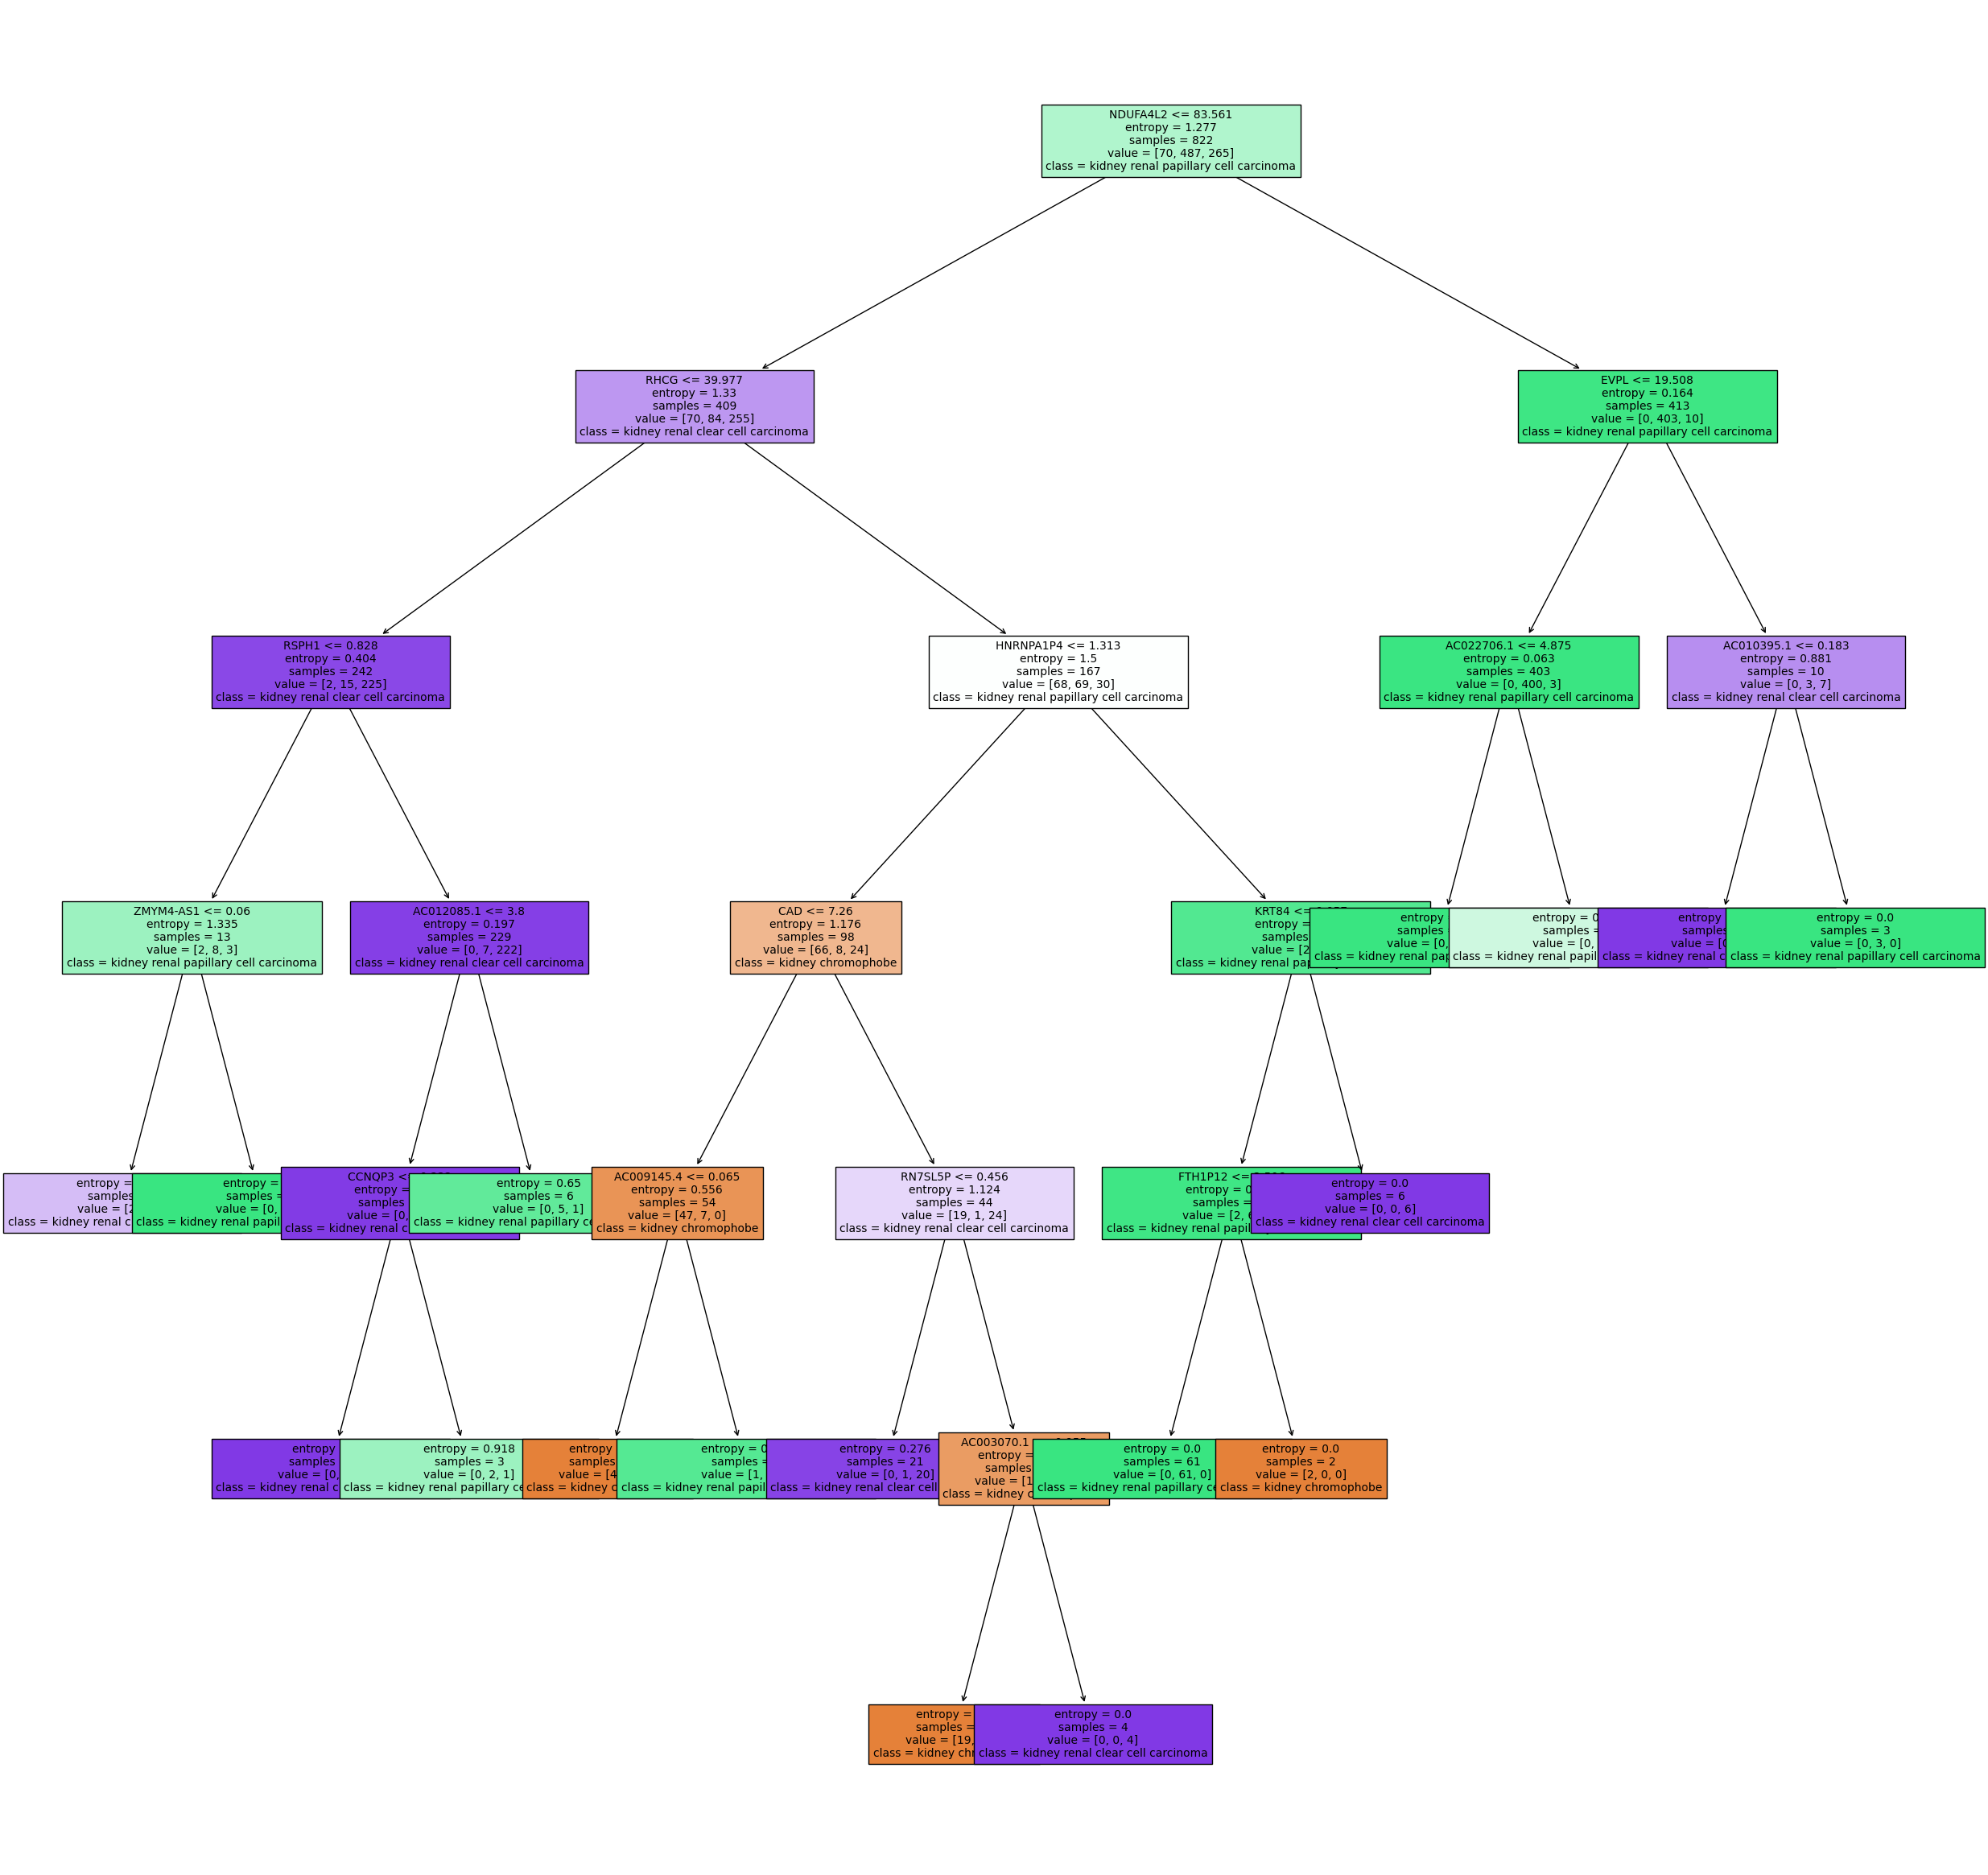

Accuracy: 0.927, Precision: 0.928, Recall: 0.927, F1 Score: 0.927

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.96      0.94      0.95       127
           2       0.88      0.91      0.90        58

    accuracy                           0.93       206
   macro avg       0.90      0.91      0.90       206
weighted avg       0.93      0.93      0.93       206

Confusion Matrix:
[[ 18   2   1]
 [  1 120   6]
 [  2   3  53]]


(0.9271844660194175,
 0.9279288025889969,
 0.9271844660194175,
 0.9274469702312389)

In [51]:
# Create an instance of the DecisionTreeClassifier
classifier_3 = DecisionTreeClassifier(criterion="entropy", random_state=SEED, min_impurity_decrease=0.01)

# Fit the classifier to the training data
classifier_3.fit(X_train, y_train)

visualize_results(X_test, y_test, classifier_3)

In [14]:
## avarage values

# for this the data must be loaded and splitted (first 3 cells)
# the single trees can be executed, but don't have to

def fit_predict_stats(tree_id, classifier_param, X_train, y_train, X_test, y_test, seed) -> list:

    classifier = DecisionTreeClassifier(
        criterion="entropy", 
        random_state=seed,
        **classifier_param
        )
    classifier.fit(X_train, y_train)
    
    # Predict the target variable for the validation data
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")

    # Calculate Precision, Recall and f1 for each class
    precision_ = precision_score(y_test, y_pred, average=None)
    recall_ = recall_score(y_test, y_pred, average=None)
    f1_ = f1_score(y_test, y_pred, average=None)

    # Print statistics for each class
    #for i, (prec, rec, f) in enumerate(zip(precision_, recall_, f1_)):
    #    print(f'Class {i}: Precision = {prec:.4f}, Recall = {rec:.4f}, F1 = {f:.4f}')
    #print()

    return f1

In [15]:
tree_versions = [
    {},
    {"min_samples_split":7},
    {"min_samples_leaf":7},
    {"min_impurity_decrease":0.01}
]

stats = []
for i, classifier_param in enumerate(tree_versions):
    print(f"tree_{i}")
    stats.append([i])
    for seed in range(SEED, SEED+10):
        stats[i].append(fit_predict_stats(f"tree_{i}", classifier_param, X_train, y_train, X_test, y_test, seed))


print(stats)

tree_0
Accuracy: 0.927, Precision: 0.929, Recall: 0.927, F1 Score: 0.927
Class 0: Precision = 0.8636, Recall = 0.9048, F1 = 0.8837
Class 1: Precision = 0.9242, Recall = 0.9606, F1 = 0.9421
Class 2: Precision = 0.9615, Recall = 0.8621, F1 = 0.9091

Accuracy: 0.913, Precision: 0.914, Recall: 0.913, F1 Score: 0.912
Class 0: Precision = 0.8636, Recall = 0.9048, F1 = 0.8837
Class 1: Precision = 0.9098, Recall = 0.9528, F1 = 0.9308
Class 2: Precision = 0.9412, Recall = 0.8276, F1 = 0.8807

Accuracy: 0.932, Precision: 0.934, Recall: 0.932, F1 Score: 0.932
Class 0: Precision = 0.8636, Recall = 0.9048, F1 = 0.8837
Class 1: Precision = 0.9248, Recall = 0.9685, F1 = 0.9462
Class 2: Precision = 0.9804, Recall = 0.8621, F1 = 0.9174

Accuracy: 0.903, Precision: 0.904, Recall: 0.903, F1 Score: 0.902
Class 0: Precision = 0.8636, Recall = 0.9048, F1 = 0.8837
Class 1: Precision = 0.9023, Recall = 0.9449, F1 = 0.9231
Class 2: Precision = 0.9216, Recall = 0.8103, F1 = 0.8624

Accuracy: 0.913, Precision: 0

In [59]:
tree_versions2 = [
    {"min_impurity_decrease":0.005},
    {"min_impurity_decrease":0.008},
    {"min_impurity_decrease":0.01},
    {"min_impurity_decrease":0.02},
    {"min_impurity_decrease":0.025}
]

stats2 = []
for i, classifier_param in enumerate(tree_versions2):
    print(f"tree_{i}")
    stats2.append([i])
    for seed in range(SEED, SEED+10):
        stats2[i].append(fit_predict_stats(f"tree_{i}", classifier_param, X_train, y_train, X_test, y_test, seed))


print(stats2)

tree_0
Accuracy: 0.917, Precision: 0.919, Recall: 0.917, F1 Score: 0.918
Accuracy: 0.913, Precision: 0.914, Recall: 0.913, F1 Score: 0.913
Accuracy: 0.922, Precision: 0.926, Recall: 0.922, F1 Score: 0.923
Accuracy: 0.908, Precision: 0.908, Recall: 0.908, F1 Score: 0.908
Accuracy: 0.913, Precision: 0.915, Recall: 0.913, F1 Score: 0.913
Accuracy: 0.898, Precision: 0.899, Recall: 0.898, F1 Score: 0.899
Accuracy: 0.903, Precision: 0.903, Recall: 0.903, F1 Score: 0.903
Accuracy: 0.908, Precision: 0.908, Recall: 0.908, F1 Score: 0.908
Accuracy: 0.908, Precision: 0.909, Recall: 0.908, F1 Score: 0.908
Accuracy: 0.927, Precision: 0.927, Recall: 0.927, F1 Score: 0.927
tree_1
Accuracy: 0.922, Precision: 0.924, Recall: 0.922, F1 Score: 0.923
Accuracy: 0.922, Precision: 0.923, Recall: 0.922, F1 Score: 0.922
Accuracy: 0.932, Precision: 0.935, Recall: 0.932, F1 Score: 0.933
Accuracy: 0.908, Precision: 0.908, Recall: 0.908, F1 Score: 0.908
Accuracy: 0.922, Precision: 0.923, Recall: 0.922, F1 Score: 0.

In [5]:
tree_versions3 = [
    {"min_samples_split":2},
    {"min_samples_split":5},
    {"min_samples_split":7},
    {"min_samples_leaf":2},
    {"min_samples_leaf":5},
    {"min_samples_leaf":7}
]

stats3 = []
for i, classifier_param in enumerate(tree_versions3):
    print(f"tree_{i}")
    stats3.append([i])
    for seed in range(SEED, SEED+10):
        stats3[i].append(fit_predict_stats(f"tree_{i}", classifier_param, X_train, y_train, X_test, y_test, seed))


print(stats3)

tree_0
Accuracy: 0.927, Precision: 0.929, Recall: 0.927, F1 Score: 0.927
Accuracy: 0.913, Precision: 0.914, Recall: 0.913, F1 Score: 0.912
Accuracy: 0.932, Precision: 0.934, Recall: 0.932, F1 Score: 0.932
Accuracy: 0.903, Precision: 0.904, Recall: 0.903, F1 Score: 0.902
Accuracy: 0.913, Precision: 0.913, Recall: 0.913, F1 Score: 0.912
Accuracy: 0.908, Precision: 0.910, Recall: 0.908, F1 Score: 0.907
Accuracy: 0.913, Precision: 0.914, Recall: 0.913, F1 Score: 0.912
Accuracy: 0.917, Precision: 0.919, Recall: 0.917, F1 Score: 0.917
Accuracy: 0.913, Precision: 0.913, Recall: 0.913, F1 Score: 0.912
Accuracy: 0.917, Precision: 0.918, Recall: 0.917, F1 Score: 0.917
tree_1
Accuracy: 0.922, Precision: 0.926, Recall: 0.922, F1 Score: 0.922
Accuracy: 0.913, Precision: 0.915, Recall: 0.913, F1 Score: 0.912
Accuracy: 0.922, Precision: 0.924, Recall: 0.922, F1 Score: 0.922
Accuracy: 0.908, Precision: 0.909, Recall: 0.908, F1 Score: 0.907
Accuracy: 0.922, Precision: 0.924, Recall: 0.922, F1 Score: 0.

In [58]:
models = [
    {"original":""},
    {"min_samples_split":10},
    {"min_samples_leaf":10},
    {"min_impurity_decrease":0.01},
    {"min_impurity_decrease":0.03}
]

for i, m, s in zip(range(len(models)), models, stats):
    values_only = s[-1:]    #dropping tree id before avaraging
    print(f"avarage f1 for tree_{i}: {np.mean(values_only):3f} (property {[*m][0]}={m[[*m][0]]})")

avarage f1 for tree_0: 0.926998 (property original=)
avarage f1 for tree_1: 0.917411 (property min_samples_split=10)
avarage f1 for tree_2: 0.889222 (property min_samples_leaf=10)
avarage f1 for tree_3: 0.931729 (property min_impurity_decrease=0.01)
avarage f1 for tree_4: 0.897501 (property min_impurity_decrease=0.03)


In [60]:
tree_versions2 = [
    {"min_impurity_decrease":0.005},
    {"min_impurity_decrease":0.008},
    {"min_impurity_decrease":0.01},
    {"min_impurity_decrease":0.02},
    {"min_impurity_decrease":0.025}
]

for i, m, s in zip(range(len(tree_versions2)), tree_versions2, stats2):
    values_only = s[-1:]    #dropping tree id before avaraging
    print(f"avarage f1 for tree_{i}: {np.mean(values_only):3f} (property {[*m][0]}={m[[*m][0]]})")

avarage f1 for tree_0: 0.926998 (property min_impurity_decrease=0.005)
avarage f1 for tree_1: 0.926998 (property min_impurity_decrease=0.008)
avarage f1 for tree_2: 0.931729 (property min_impurity_decrease=0.01)
avarage f1 for tree_3: 0.897501 (property min_impurity_decrease=0.02)
avarage f1 for tree_4: 0.897501 (property min_impurity_decrease=0.025)


In [7]:
tree_versions3 = [
    {"min_samples_split":2},
    {"min_samples_split":5},
    {"min_samples_split":7},
    {"min_samples_leaf":2},
    {"min_samples_leaf":5},
    {"min_samples_leaf":7}
]

for i, m, s in zip(range(len(tree_versions3)), tree_versions3, stats3):
    values_only = s[-1:]    #dropping tree id before avaraging
    print(f"avarage f1 for tree_{i}: {np.mean(values_only):3f} (property {[*m][0]}={m[[*m][0]]})")

avarage f1 for tree_0: 0.916966 (property min_samples_split=2)
avarage f1 for tree_1: 0.926846 (property min_samples_split=5)
avarage f1 for tree_2: 0.926846 (property min_samples_split=7)
avarage f1 for tree_3: 0.926846 (property min_samples_leaf=2)
avarage f1 for tree_4: 0.916249 (property min_samples_leaf=5)
avarage f1 for tree_5: 0.936850 (property min_samples_leaf=7)


In [ ]:
# tried another model

In [ ]:
#random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def visualize_forest(X_test, y_test, classifier):
    features = X_test.columns.tolist()
    class_names = ["kidney chromophobe ", "kidney renal papillary cell carcinoma", "kidney renal clear cell carcinoma"]

    # Predict the target variable for the validation data
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return (accuracy, precision, recall, f1)


In [ ]:
# Create an instance of the DecisionTreeClassifier
classifier_5 =  RandomForestClassifier()
classifier_5.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
visualize_forest(X_test, y_test, classifier_5)

Accuracy: 0.9368932038834952
Precision: 0.9396668001675665
Recall: 0.9368932038834952
F1 Score: 0.9359143005426762
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        25
           1       0.95      0.96      0.96       110
           2       0.89      0.96      0.93        71

    accuracy                           0.94       206
   macro avg       0.95      0.89      0.92       206
weighted avg       0.94      0.94      0.94       206

Confusion Matrix:
[[ 19   2   4]
 [  0 106   4]
 [  0   3  68]]


(0.9368932038834952,
 0.9396668001675665,
 0.9368932038834952,
 0.9359143005426762)